# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

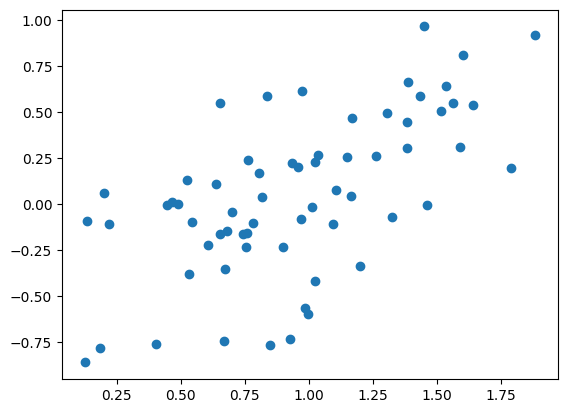

In [96]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

plot1 = plt.scatter(x.T[0], y)
plot1



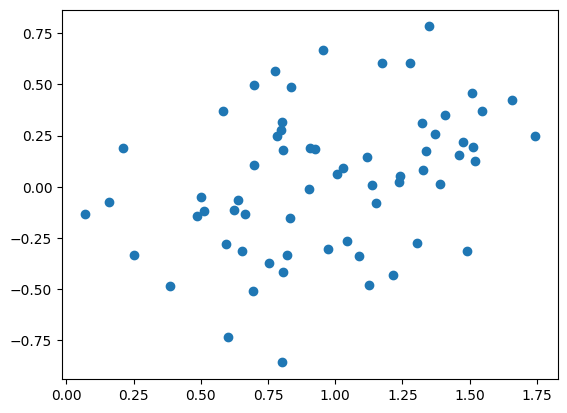

In [32]:
plot2 = plt.scatter(x.T[1], y)
plot2


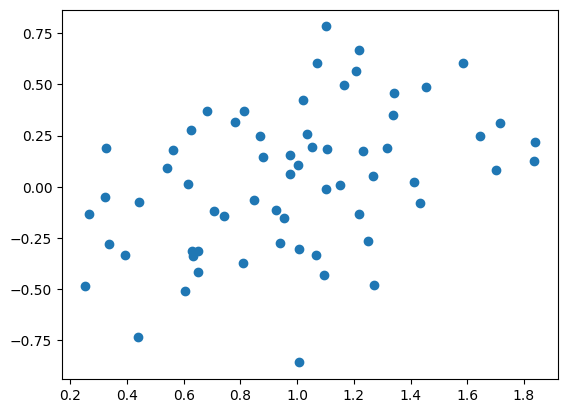

In [33]:

plot3 = plt.scatter(x.T[2], y)
plot3


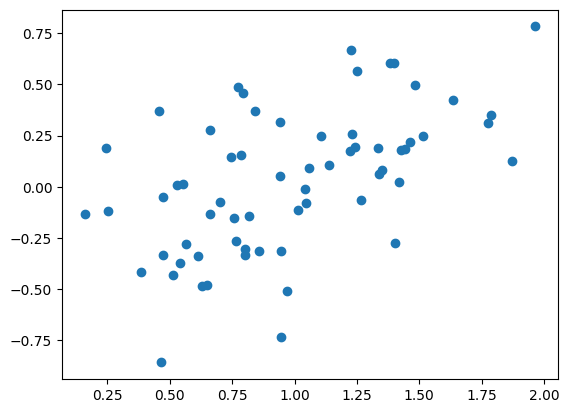

In [34]:

plot4 = plt.scatter(x.T[3], y)
plot4

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [97]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
np.dot(left, right)

array([ 0.29324156,  0.19018662,  0.09361394,  0.39623602, -0.91612167])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

/var/folders/lj/vqcf6snx1r33zxx0vccd4fh80000gn/T/ipykernel_85605/1316310441.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(x, y)[0]


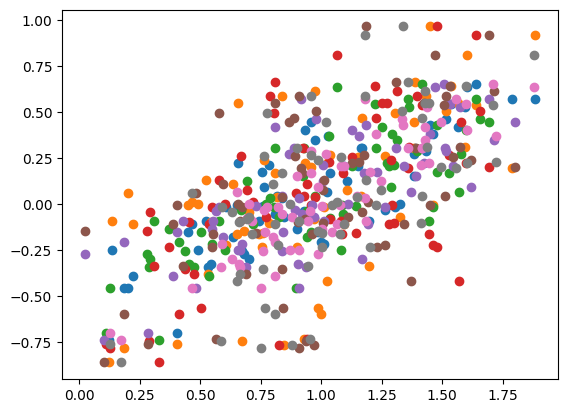

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
beta = np.linalg.lstsq(x, y)[0]
beta
pred = np.dot(x, beta)

plt.scatter(x.T[0], pred)
plt.scatter(x.T[0], y)
plt.scatter(x.T[1], pred)
plt.scatter(x.T[1], y)
plt.scatter(x.T[2], pred)
plt.scatter(x.T[2], y)
plt.scatter(x.T[3], pred)
plt.scatter(x.T[3], y)

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [56]:
import pandas as pd
import numpy as np
credit = pd.read_csv('/Users/meganrahrig/Desktop/Credit.csv')
credit.head()


,Unnamed: 0.1,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [83]:
columns = ['Income', 'Limit','Age','Cards','Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X


array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 2.00000e+00, 3.33000e+02,
        1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 3.00000e+00, 9.03000e+02,
        1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 4.00000e+00, 5.80000e+02,
        1.00000e+00],
       [1.48924e+02, 9.50400e+03, 3.60000e+01, 3.00000e+00, 9.64000e+02,
        1.00000e+00],
       [5.58820e+01, 4.89700e+03, 6.80000e+01, 2.00000e+00, 3.31000e+02,
        1.00000e+00]])

In [87]:
left = np.linalg.inv(np.dot(X.T, X))
right = np.dot(y.T, X)
result = np.dot(left, right)
result

array([ 3.52734375e+00, -6.31713867e-03, -1.62109375e-01,  4.83906250e+01,
        3.56140137e-02,  2.75250000e+02])

In [51]:
y = credit['Rating']
y

0    283
1    483
2    514
3    681
4    357
Name: Rating, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

In [88]:
pred = np.dot(X, result)
pred

array([408.12507153, 771.29759521, 802.20057104, 914.18590137,
       538.97604639])

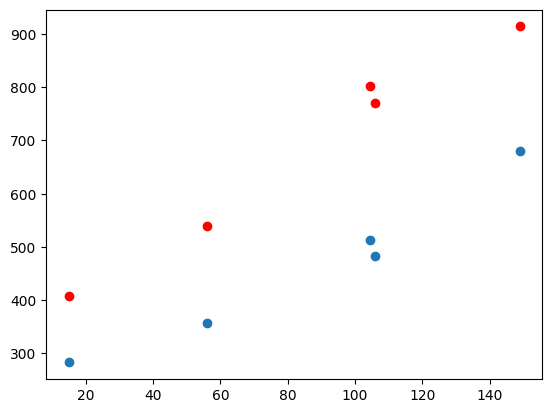

In [89]:

plt.scatter(X.T[0], pred, c='red')
plt.scatter(X.T[0], y)

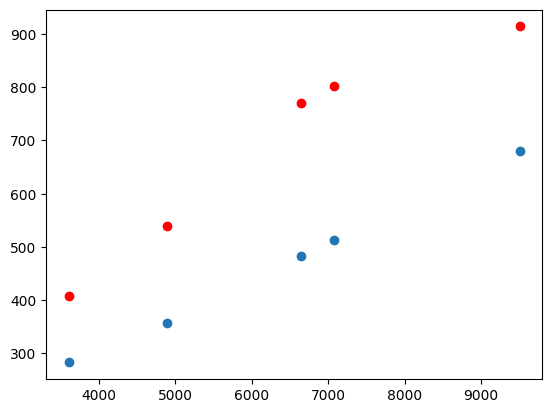

In [90]:

plt.scatter(X.T[1], pred, c='red')
plt.scatter(X.T[1], y)

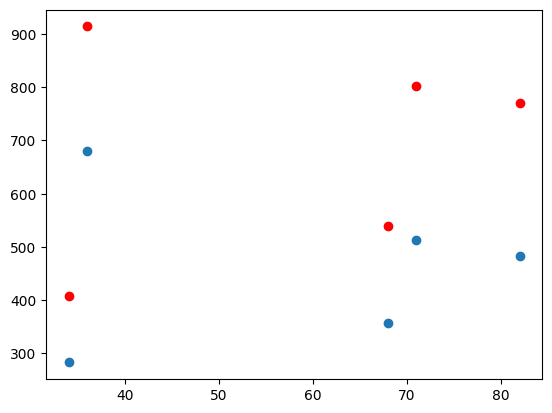

In [91]:

plt.scatter(X.T[2], pred, c='red')
plt.scatter(X.T[2], y)

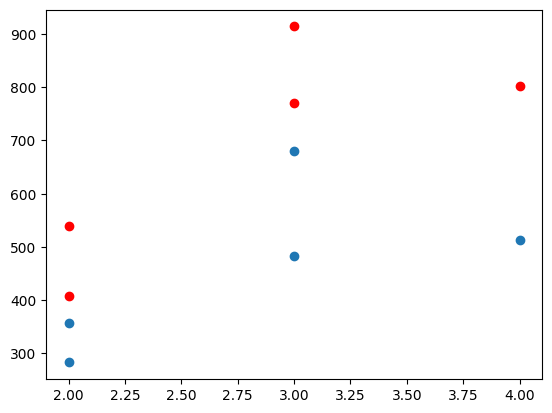

In [92]:

plt.scatter(X.T[3], pred, c='red')
plt.scatter(X.T[3], y)

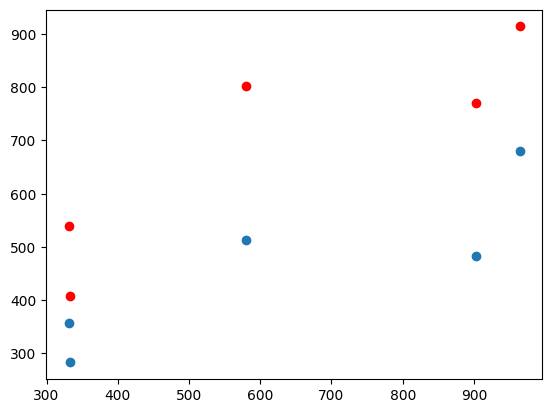

In [93]:

plt.scatter(X.T[4], pred, c='red')
plt.scatter(X.T[4], y)

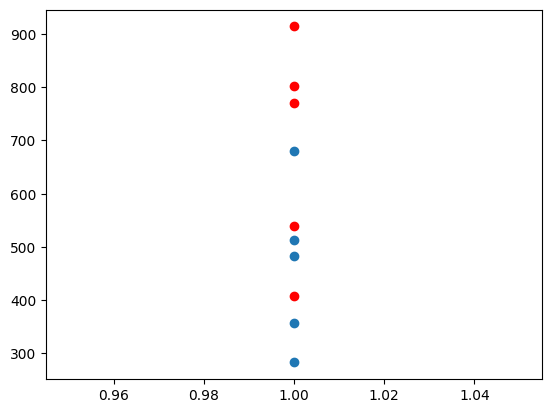

In [94]:

plt.scatter(X.T[5], pred, c='red')
plt.scatter(X.T[5], y)